# Credit Risk Prediction Using Machine Learning Techniques 



### Predicting the risk of client default using Random Forest Classifier, Logistic Regression models, Decision Tree Classifier 


**Credit risk analysis** is a process performed by credit analysts to evaluate the credit repayment capabilities of potential borrowers. Its main purpose is to determine the default risk in order to decide whether a borrower's loan application will be approved or not. If the borrower has an acceptable level of risk, the analyst can recommend that the loan be approved with the specified conditions. As a result of this analysis, borrowers are assigned a risk rating, which directly affects their access to credit.

The following factors are taken into account during the analysis: Capacity, the borrower's ability to repay the loan; Character, financial responsibility and reliability; Capital, financial resources; Conditions, the terms of the loan and the economic environment; and Collateral, the assets that will secure the loan. These factors help estimate the probability of default and the potential risk of financial loss by comprehensively evaluating the borrower's characteristics and credit terms.

**Machine Learning** models have been helping these companies to improve the accuracy of their credit risk analysis, providing a scientific method to identify potential debtors in advance.

## About the Data

This dataset is a simplified version designed to demonstrate the processes and techniques required to predict potential credit default. It includes demographic, financial, and behavioral attributes of individuals. The **Age** variable represents the age of individuals numerically, while **Sex** categorizes individuals as male or female. The **Job** variable reflects the skill level and residency status of individuals, ranging from 0 (unskilled and non-resident) to 3 (highly skilled). The **Housing** variable categorizes individuals’ housing situations as "own," "rent," or "free."

The **Saving accounts** and **Checking account variables** indicate the levels of savings or account balances, categorized as "little," "moderate," "quite rich," or "rich." The Credit amount variable shows the requested **credit amount** in Deutsche Marks (DM), while the Duration variable specifies the loan duration in months. The Purpose variable identifies the purpose of the loan, such as "car," "furniture/equipment," "radio/TV," "domestic appliances," "repairs," "education," "business," or "vacation/others." Lastly, the **Risk** variable, as the target feature, indicates whether the loan is likely to default ("Yes") or not ("No").

This dataset provides a comprehensive foundation for analyzing factors contributing to credit default and enables the development of predictive models based on individual and financial characteristics.


## Understanding Data

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings('ignore')
cmap=sns.color_palette('Blues_r')

In [2]:
df = pd.read_csv("german_credit_data.csv",index_col=0)

In [3]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB
None


In [5]:
print(df.nunique())

Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
Risk                  2
dtype: int64


In [6]:
print(df.describe())

               Age          Job  Credit amount     Duration
count  1000.000000  1000.000000    1000.000000  1000.000000
mean     35.546000     1.904000    3271.258000    20.903000
std      11.375469     0.653614    2822.736876    12.058814
min      19.000000     0.000000     250.000000     4.000000
25%      27.000000     2.000000    1365.500000    12.000000
50%      33.000000     2.000000    2319.500000    18.000000
75%      42.000000     2.000000    3972.250000    24.000000
max      75.000000     3.000000   18424.000000    72.000000


#### Findings:With this basic data fummary, we can see that

- The data size is: 1000 (smaples) X 10 (properties).
- Among the 10 properties, Risk is the target variable (dependent variable) (we need to predict with a model)
- There are 4 avrables with int64 type, and 6 with object(string) type.
- We can see the range of each variables the most value is 921 from Credit amount, and the least is a binary form Sex, and Risk. 
- We can also see that **Saving accounts** and **Checking account** have missing values since their "non-null" is less than the number of samples. 
  

## Data  Analysis 

#### Data Attribute Analysis with EDA
EDA is used to sever two purposes:

- 1.Find each individual varaible's distribution (assess its quality), It is called "Univariate analysis"
- 2.find relations betwwen each individual variable and the dependent varaible. it is called "Bivariate analysis"

#### Univariate Analysis:

In [7]:
import matplotlib.pyplot as plt
import math
import seaborn as sns  

def plotObjColumnDistribution(df, nGraphShown, nGraphPerRow):
    columnNames = df.select_dtypes(include=['object']).columns[:nGraphShown]
    nGraphRow = math.ceil(len(columnNames) / nGraphPerRow)  
    plt.figure(figsize=(6 * nGraphPerRow, 5 * nGraphRow))  
    
    for i, col in enumerate(columnNames):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        
        valueCounts = df[col].value_counts()
        
        sns.barplot(
            x=valueCounts.index, 
            y=valueCounts.values, 
            palette="viridis"  # Renk paleti
        )
        
        plt.title(f'Distribution of {col}')
        plt.xticks(rotation=45)
        plt.ylabel('Count')
        plt.xlabel(col)
    
    plt.tight_layout()
    plt.show()



In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


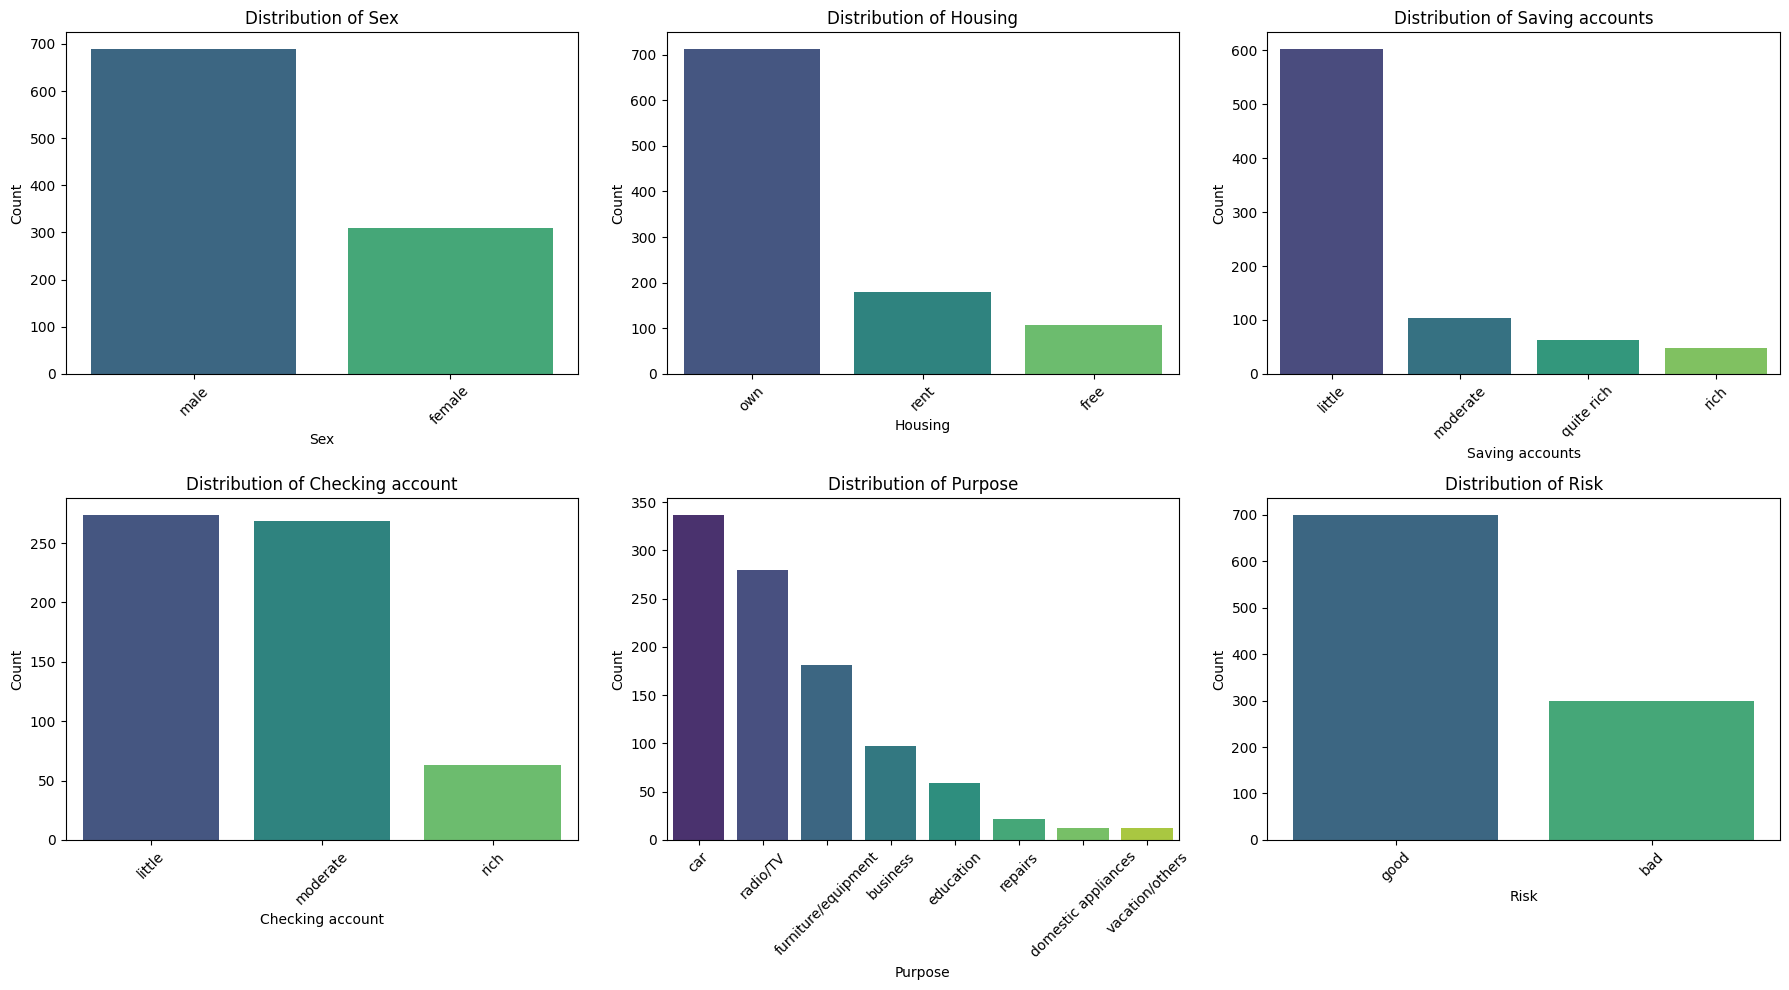

In [9]:
plotObjColumnDistribution(df, 10, 3)

**Findings**:
1. Among the 6 catagorical attributes. The value are distributed **Unevenly** most are **Skewed** to the left. It may affact the prediction later.
2. The targeted dependent varaible Risk is **imblanced the ratio is 700:300 between "good" and "bad"

#### Bivariate analysis

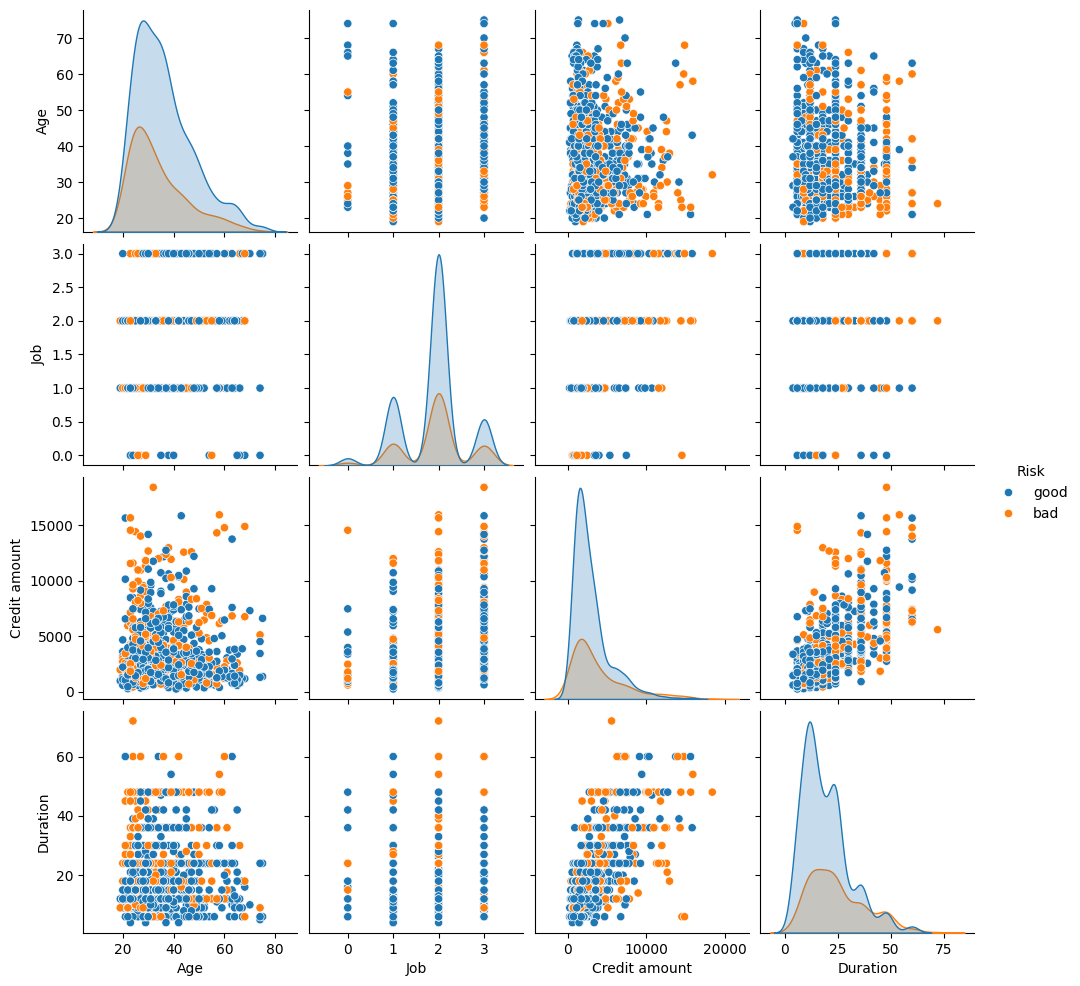

In [10]:
sns.pairplot(df, hue="Risk")

# **Data Preprocessing** <a id="preprocessing"></a> <br>
We need to produce a new dataset (df_credit) for prediction model construction
1. We need to convert the target varaible **Risk** into a numerical.
2. We need to split df_credit into predict varible and dependent varaible.
2. we do some individual varaible **transforamtion**, **fill missing data**  

#### Prepare The Target Variable 'Risk'

In [11]:
df = pd.read_csv("german_credit_data.csv",index_col=0)

df_credit = df

In [12]:
df_y = df[['Risk']]
df_y['Risk'] = np.where(df_y.loc[ : , 'Risk']=='good', 0, 1)
df_y.head()
df_y.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Risk    1000 non-null   int64
dtypes: int64(1)
memory usage: 15.6 KB


#### Prepare The Predictor Variables

In [13]:
df_credit = df_credit.drop(["Risk"], axis=1)
df_credit.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


#### Deal With Missing Values

count        817
unique         4
top       little
freq         603
Name: Saving accounts, dtype: object


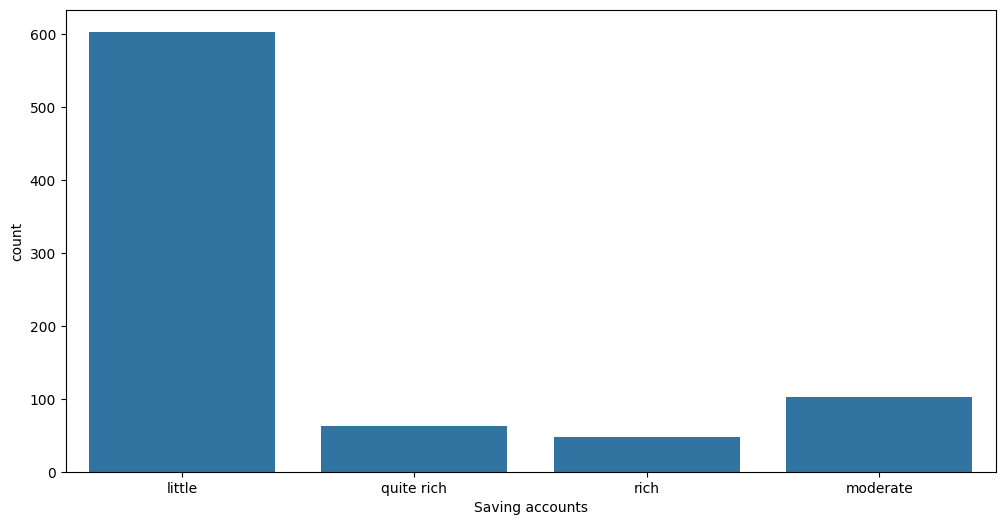

In [14]:
print(df_credit['Saving accounts'].describe())

plt.figure(figsize=(12,6))
sns.countplot(x='Saving accounts',data = df_credit)

plt.show()

#### From above descritipn and plot, we can see that the value of the **saving account** distribution and **Risk** distribution over the saving account:
1. majority is little, (603/817), the easist solusion is aasign all the missing value as "little"
2. The best solusion is using current distribution to assing randomly generated value ot keep the distribution un changed.

In [15]:
df_credit['Saving accounts'].fillna('little', inplace = True)
df_credit['Saving accounts'].describe()

count       1000
unique         4
top       little
freq         786
Name: Saving accounts, dtype: object

count        606
unique         3
top       little
freq         274
Name: Checking account, dtype: object


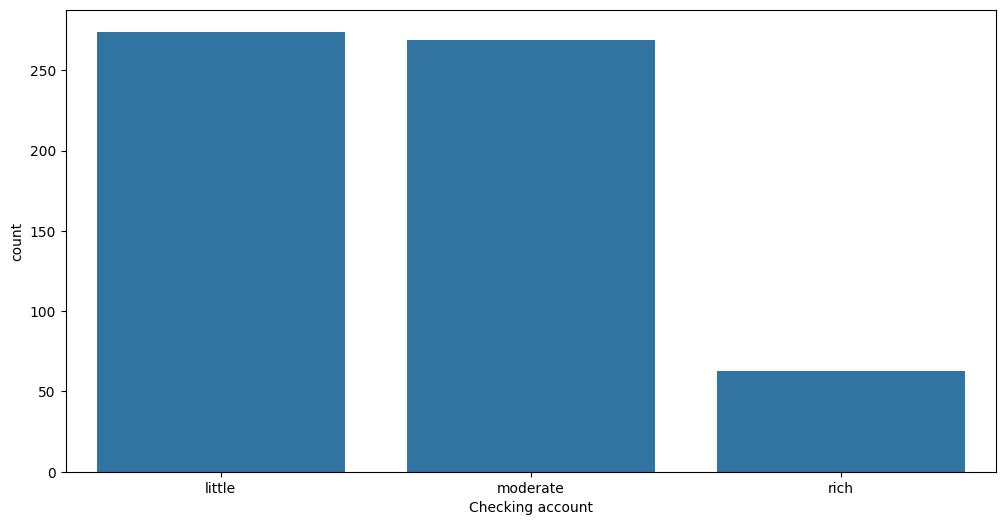

In [16]:
print(df_credit['Checking account'].describe())

plt.figure(figsize=(12,6))
sns.countplot(x='Checking account',data=df_credit)

plt.show()

**Findings**: 
1. We can see that the current distribution is pretty even between **Little** and **Moderate**; and only small amount has value of **rich**
2. The targeted dependent varaible **Risk** for the three category distribution are vary a lot. 

**Suggestion:** among the many fill misiing value methods, one of them may suitable for this situation. **that is create a new catergory value** like *NoInfo* it self is valualbe since the number of missing value is almost the same quntity with any other two most couurences. 274 for littel and 194 missing values. 

<Axes: xlabel='Checking account', ylabel='count'>

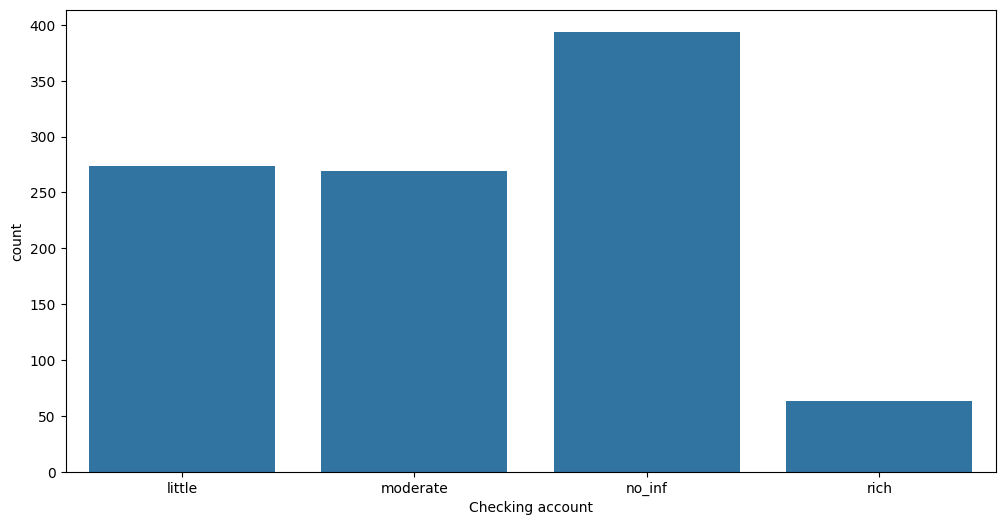

In [17]:
df_credit['Checking account'].fillna('no_inf', inplace=True)
df_credit['Checking account'].head()

plt.figure(figsize=(12,6))
sns.countplot(x='Checking account',data=df_credit)

# **Prediciton Model Construction and Evaluation** <a id="Modelling"></a> <br>

Python has a rich liberary for Machine Learning. The most used liberary is **Sklearn**. In sklearn, all machine learning models are implemented as Python classes. so it very simple to use. 

For the initial impression of the poosible prediction models, we use all the popular and offered by the Python **Sklearn** models:
- Random Forest Classifier
- Logistic Regression models
- Decision Tree Classifier

In [18]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score 

from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [19]:
X = df_credit
y = df_y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Model LR has: 0.708 accuracy
Model RF has: 0.684 accuracy
Model DT has: 0.628 accuracy


<Figure size 1100x600 with 0 Axes>

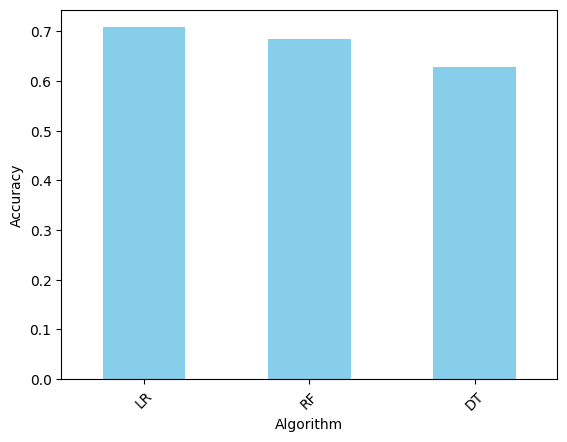

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


seed = 42


df = pd.read_csv("german_credit_data.csv")

le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Risk'] = le.fit_transform(df['Risk'])  
df = pd.get_dummies(df, columns=['Housing', 'Saving accounts', 'Checking account', 'Purpose'], drop_first=True)


X = df.drop(columns=['Risk'])
y = df['Risk']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)


models = [
    ('LR', LogisticRegression()),
    ('RF', RandomForestClassifier(random_state=seed)),
    ('DT', DecisionTreeClassifier(random_state=seed))
]


results = []
names = []

for name, model in models:
    model.fit(X_train, y_train)
    pre_results = model.predict(X_test)
    model_acc = accuracy_score(y_test, pre_results)
    names.append(name)
    results.append(model_acc)
    msg = "Model %s has: %0.3f accuracy" % (name, model_acc)
    print(msg)


results_df = pd.DataFrame({'Name': names, 'Results': results})


fig = plt.figure(figsize=(11, 6))
fig.suptitle('Algorithm Comparison')
results_df.plot.bar(x='Name', y='Results', rot=45, legend=False, color='skyblue')
plt.ylabel('Accuracy')
plt.xlabel('Algorithm')
plt.show()


**Findings**: 

1. Model Performances:
- Logistic Regression (LR) achieved the highest accuracy: 70.8%.
- Random Forest (RF) ranked second with an accuracy of 68.4%.
- Decision Tree (DT) had the lowest accuracy: 62.8%.
- The performance of the LR model is better compared to the other models, but the difference is not significant.

2. Model Comparison:
- Logistic Regression (LR) appears to fit well with the features and the target variable in the dataset.
- Random Forest (RF), despite being a more complex model, was not as effective as Logistic Regression. This may indicate that RF requires further hyperparameter tuning or that the dataset is relatively small.
- Decision Tree (DT) seems prone to overfitting and has lower generalization ability compared to the other models.


# **Features Selection**

For any prediction model, feature selection is crucial as it significantly impacts the model's performance. Specifically, it determines:

1. The number of features used: More features do not always mean better performance. Irrelevant or redundant features can reduce the efficiency of the model.

2. Which features to use: Features that are highly correlated with each other should be avoided to prevent multicollinearity, which can lead to misleading results.

In this case, **correlation analysis** will be used for feature selection. By calculating the correlation between the features, those that are highly correlated with each other will be removed and the remaining features will be used to improve the performance of the model and provide better interpretability.

## Correlation Analysis


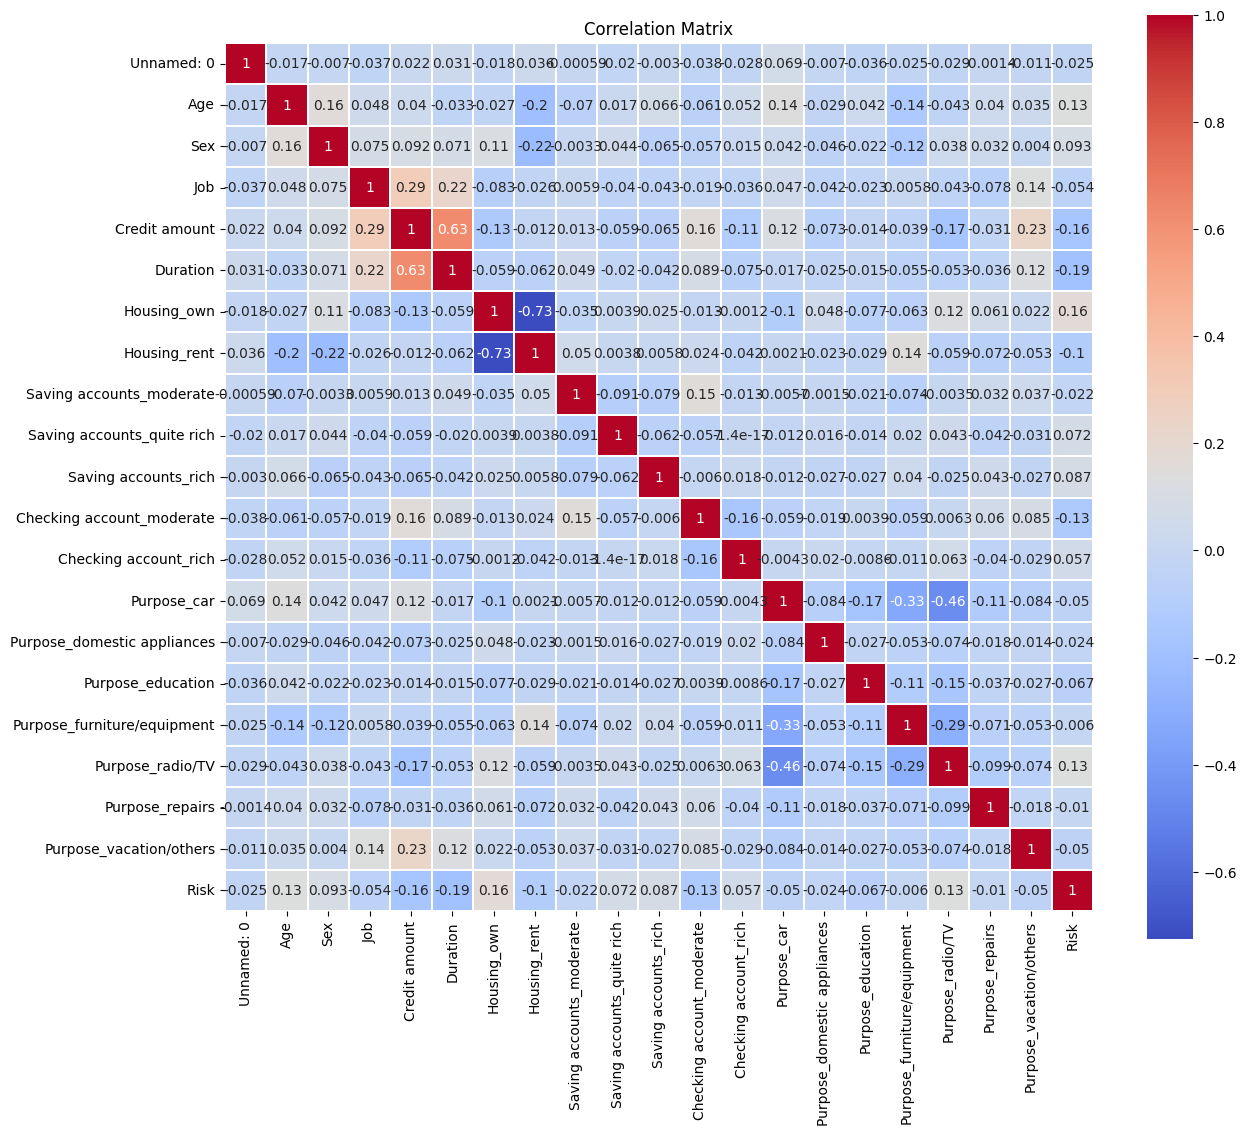

In [21]:
data_train = pd.concat([X_train, y_train], axis=1)


plt.figure(figsize=(14, 12))
sns.heatmap(data_train.astype(float).corr(), linewidths=0.1, vmax=1.0, 
            square=True, linecolor='white', annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


Above correlation heatmap shows **the correlations among the variables**. 
Apart from the correlations between varibles, Our attention should focuse on the correlation between the predictor varibles and also shows the coorelations between predictors and the target variable **Risk**.

**Findings:**
1. The most positive correlation with **Risk** are: **Checking account_little, Duration, saving account little, house_rent and Credit_amount**. 
2. **Checking account_no_info** has a negitive on the **Risk**.
3. Correlation analysis provides basic inforamtion on the coonections between predictors and the target varaible.

In [22]:
var_importance = data_train.corrwith(data_train["Risk"]).abs()
var_importance.sort_values(ascending=False)

Risk                           1.000000
Duration                       0.191529
Housing_own                    0.164354
Credit amount                  0.161974
Age                            0.132274
Purpose_radio/TV               0.130509
Checking account_moderate      0.125832
Housing_rent                   0.100591
Sex                            0.093223
Saving accounts_rich           0.086597
Saving accounts_quite rich     0.072047
Purpose_education              0.067157
Checking account_rich          0.057122
Job                            0.054356
Purpose_car                    0.049982
Purpose_vacation/others        0.049533
Unnamed: 0                     0.025451
Purpose_domestic appliances    0.024261
Saving accounts_moderate       0.021726
Purpose_repairs                0.010000
Purpose_furniture/equipment    0.006022
dtype: float64

**Findings:**

With this order we can decide hwo many and which parameters to use.

# Random Forest

The **Random Forest** model was chosen because it works effectively with complex datasets, processes both numerical and categorical data efficiently, and is resistant to overfitting. Its ability to handle missing data ensures reliable results in real-world scenarios. Additionally, after model training, it can identify which features have the most significant impact on credit risk and deliver accurate predictions with high reliability. The flexibility of its parameter settings allows the model to adapt easily to different datasets. For all these reasons, Random Forest provides a reliable, balanced, and high-performing solution for credit evaluation processes.

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd


df = pd.read_csv("german_credit_data.csv")  


df['Saving accounts'] = df['Saving accounts'].fillna('unknown')
df['Checking account'] = df['Checking account'].fillna('unknown')
df = pd.get_dummies(df, drop_first=True)  


X = df.drop('Risk_good', axis=1)  
y = df['Risk_good']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

### Score Values

In [38]:
from sklearn.metrics import classification_report, roc_auc_score


y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]


print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print(f"Random Forest ROC AUC Score: {roc_auc_score(y_test, y_pred_proba_rf)}")


Random Forest Classification Report:
              precision    recall  f1-score   support

       False       0.62      0.32      0.42        91
        True       0.75      0.91      0.83       209

    accuracy                           0.73       300
   macro avg       0.69      0.62      0.62       300
weighted avg       0.71      0.73      0.70       300

Random Forest ROC AUC Score: 0.7410221357589779


**Findings**:
- The Random Forest model demonstrated a moderate performance in credit risk analysis, achieving an accuracy of 73% and an ROC AUC score of 0.74. While the model performed well in the good risk class (Recall: 0.91, Precision: 0.75), its performance in the bad risk class was notably lower (Recall: 0.32).

### Cross Validation

In [39]:
from sklearn.model_selection import cross_val_score


rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5)
print(f"Random Forest Cross Validation Scores: {rf_cv_scores}")


Random Forest Cross Validation Scores: [0.78571429 0.70714286 0.75714286 0.7        0.77857143]


**Findings**:
- The Random Forest model demonstrated consistent and reliable performance based on cross-validation results. The accuracy scores across five different validation sets range between 70% and 78%, indicating stable and balanced performance. This suggests that the model generalizes well across different subsets of data and has a low risk of overfitting.

 ### ROC Curve

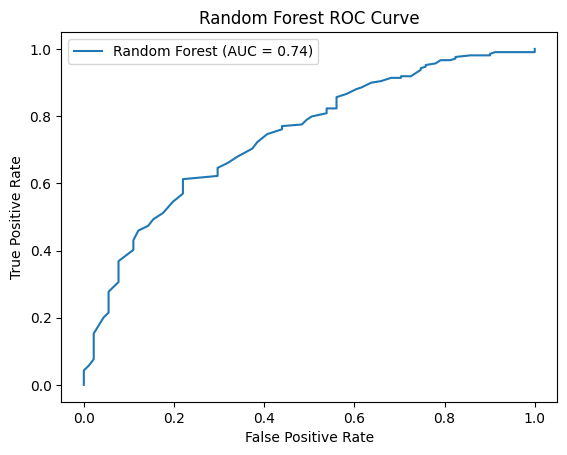

In [40]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)

plt.figure()
plt.plot(fpr_rf, tpr_rf, label="Random Forest (AUC = {:.2f})".format(roc_auc_score(y_test, y_pred_proba_rf)))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest ROC Curve")
plt.legend()
plt.show()


**Findings**: 

The ROC curve for the Random Forest model illustrates its performance in distinguishing between positive (good risk) and negative (bad risk) classes. The model achieved an AUC score of 0.74, indicating a moderate ability to differentiate between the two classes.

- A higher True Positive Rate (TPR) and a lower False Positive Rate (FPR) across most thresholds suggest that the model performs reasonably well.
- However, the curve's deviation from the ideal top-left corner indicates that there is still room for improvement, especially in minimizing false positives.

 # Logistic Regression

The **Logistic Regression** model is primarily used in credit risk analysis due to its **simple and interpretable structure, transparent results, and fast training time.** The model directly explains the impact of each variable on credit risk, simplifying the decision-making process. Additionally, it provides clear and reliable results by expressing an individual's credit risk as percentage-based probabilities. With a low risk of overfitting and the ability to handle class imbalance, it delivers consistent performance across different datasets. Logistic Regression is preferred in financial analysis for its clarity, reliability, and efficiency in producing actionable insights.

In [49]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)



LogisticRegression(max_iter=1000, random_state=42)

### Score Values

In [43]:
y_pred_lr = lr_model.predict(X_test)
y_pred_proba_lr = lr_model.predict_proba(X_test)[:, 1]

print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))
print(f"Logistic Regression ROC AUC Score: {roc_auc_score(y_test, y_pred_proba_lr)}")


Logistic Regression Classification Report:
              precision    recall  f1-score   support

       False       0.58      0.32      0.41        91
        True       0.75      0.90      0.82       209

    accuracy                           0.72       300
   macro avg       0.67      0.61      0.62       300
weighted avg       0.70      0.72      0.70       300

Logistic Regression ROC AUC Score: 0.766181187233819



**Findings**: 

- The Logistic Regression model demonstrated 72% accuracy and an ROC AUC score of 0.77, indicating solid performance in credit risk analysis. The model achieved high success in the good risk class (Recall: 0.90, Precision: 0.75) but showed lower performance in the bad risk class (Recall: 0.32, Precision: 0.58). This suggests that while the model effectively predicts good risk cases, there is room for improvement in identifying bad risk cases. Overall, the model provides reliable and consistent results for credit risk prediction.

### Cross Validation

In [44]:
lr_cv_scores = cross_val_score(lr_model, X_train, y_train, cv=5)
print(f"Logistic Regression Cross Validation Scores: {lr_cv_scores}")


Logistic Regression Cross Validation Scores: [0.77142857 0.69285714 0.70714286 0.73571429 0.75      ]


**Findings**: 

- The Logistic Regression model demonstrated consistent performance across cross-validation folds, with accuracy scores ranging between 69% and 77%. This indicates that the model generalizes well across different subsets of data and maintains a stable predictive performance. The results suggest that Logistic Regression is a reliable choice for credit risk analysis, with low variance and good adaptability to new data.

 ### ROC Curve

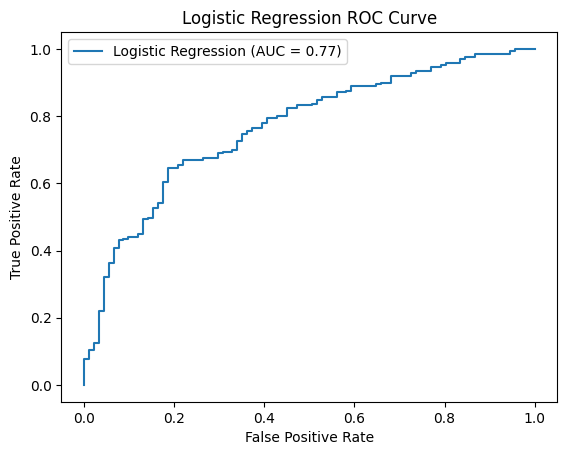

In [30]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)

plt.figure()
plt.plot(fpr_lr, tpr_lr, label="Logistic Regression (AUC = {:.2f})".format(roc_auc_score(y_test, y_pred_proba_lr)))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression ROC Curve")
plt.legend()
plt.show()



**Findings**:

- The ROC curve of the Logistic Regression model illustrates its performance in distinguishing between positive (good risk) and negative (bad risk) classes. An AUC score of 0.77 indicates that the model has a good discrimination ability overall. The curve demonstrates high True Positive Rates (TPR) and low False Positive Rates (FPR) across different threshold values. However, the curve's inability to fully reach the ideal top-left corner suggests areas for potential improvement.

# Decision Tree

The Decision Tree model is used in credit risk analysis because it can analyze data through simple and interpretable hierarchical decision rules. The model operates efficiently, even with complex datasets, and its visual representation of decision trees provides a clear understanding of how each decision is made. This transparency enhances trust in financial decision-making processes. Additionally, Decision Trees can handle both numerical and categorical data directly and are relatively unaffected by missing values. However, they are prone to overfitting, which can limit their generalization performance. Despite this, Decision Trees are preferred for quick analysis, building baseline models, and serving as a reference point for more complex algorithms.

In [31]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

### Score Values

In [45]:
y_pred_dt = dt_model.predict(X_test)
y_pred_proba_dt = dt_model.predict_proba(X_test)[:, 1]

print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))
print(f"Decision Tree ROC AUC Score: {roc_auc_score(y_test, y_pred_proba_dt)}")


Decision Tree Classification Report:
              precision    recall  f1-score   support

       False       0.42      0.43      0.43        91
        True       0.75      0.75      0.75       209

    accuracy                           0.65       300
   macro avg       0.59      0.59      0.59       300
weighted avg       0.65      0.65      0.65       300

Decision Tree ROC AUC Score: 0.5874914559125085


**Findings**:

- The Decision Tree model achieved 65% accuracy and an AUC score of 0.59, showing limited performance. While it performed moderately in the good risk class, its performance in the bad risk class was weaker. The model is interpretable but requires optimization or class balancing for better generalization.




### Cross Validation

In [46]:

dt_cv_scores = cross_val_score(dt_model, X_train, y_train, cv=5)
print(f"Decision Tree Cross Validation Scores: {dt_cv_scores}")



Decision Tree Cross Validation Scores: [0.66428571 0.66428571 0.65714286 0.62142857 0.72142857]


**Findings**:

- The Decision Tree model showed moderate performance in cross-validation, with accuracy scores ranging from 62% to 72%. This variation indicates inconsistency across different data subsets, suggesting that the model's generalization ability is limited. Further optimization or hyperparameter tuning may help stabilize its performance.

 ### ROC Curve

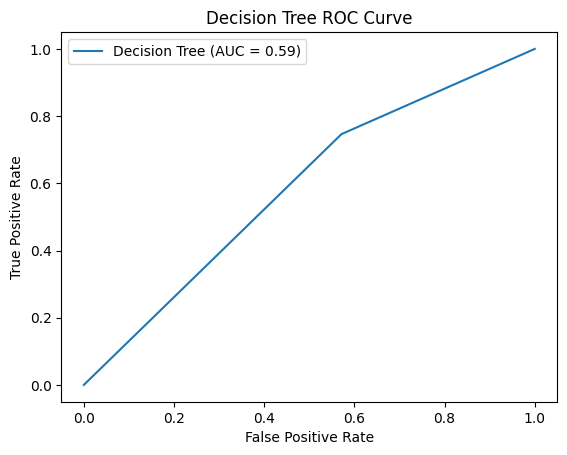

In [47]:
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_proba_dt)

plt.figure()
plt.plot(fpr_dt, tpr_dt, label="Decision Tree (AUC = {:.2f})".format(roc_auc_score(y_test, y_pred_proba_dt)))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Decision Tree ROC Curve")
plt.legend()
plt.show()


**Findings**:

- The Decision Tree model achieved an AUC score of 0.59, indicating weak discrimination ability between positive and negative classes. The ROC curve's proximity to the diagonal suggests that the model's predictions are only slightly better than random guessing. Optimization and hyperparameter tuning are needed for better performance.

## Comparison of ROC Curves Across Different Models

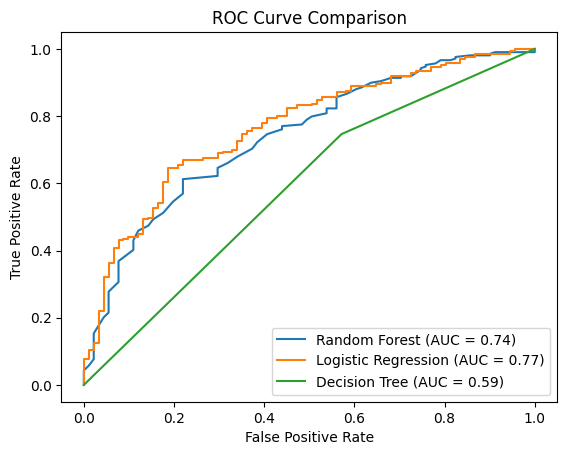

In [35]:

fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_model.predict_proba(X_test)[:, 1])
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_model.predict_proba(X_test)[:, 1])


plt.figure()
plt.plot(fpr_rf, tpr_rf, label="Random Forest (AUC = {:.2f})".format(roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])))
plt.plot(fpr_lr, tpr_lr, label="Logistic Regression (AUC = {:.2f})".format(roc_auc_score(y_test, lr_model.predict_proba(X_test)[:, 1])))
plt.plot(fpr_dt, tpr_dt, label="Decision Tree (AUC = {:.2f})".format(roc_auc_score(y_test, dt_model.predict_proba(X_test)[:, 1])))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()


1. Logistic Regression:

- AUC Score: 0.77
- Achieved the highest discrimination performance, effectively distinguishing between positive (good risk) and negative (bad risk) classes.

2. Random Forest:

- AUC Score: 0.74
- Showed performance close to Logistic Regression, demonstrating a reasonable ability to differentiate between classes.

3. Decision Tree:

- AUC Score: 0.59
- Performed poorly, with the ROC curve close to the diagonal line, indicating that predictions were not significantly better than random guessing.

**Overall Evaluation:**

- The Logistic Regression model provided the best separation between classes, followed closely by Random Forest, which also showed reliable performance. In contrast, the Decision Tree model underperformed and requires optimization for better results. For more reliable predictions, Logistic Regression or Random Forest should be preferred.

# Credit Risk Analysis and Decision Mechanism

In [55]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
import numpy as np


credit_data = pd.read_csv("german_credit_data.csv")


credit_data['Saving accounts'] = credit_data['Saving accounts'].fillna('unknown')
credit_data['Checking account'] = credit_data['Checking account'].fillna('unknown')


credit_data_encoded = pd.get_dummies(credit_data, drop_first=True)


X = credit_data_encoded.drop('Risk_good', axis=1) if 'Risk_good' in credit_data_encoded else credit_data_encoded
y = credit_data_encoded['Risk_good'] if 'Risk_good' in credit_data_encoded else None


if y is not None:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    
    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X_train, y_train)


predictions = rf_model.predict(X)
prediction_proba = rf_model.predict_proba(X)[:, 1]


credit_data['Risk Probability Good'] = prediction_proba


credit_threshold = 0.7 
credit_data['Credit Decision'] = credit_data['Risk Probability Good'].apply(
    lambda x: 'Credit Approved' if x >= credit_threshold else 'Credit Denied'
)


approved = credit_data[credit_data['Credit Decision'] == 'Credit Approved']
denied = credit_data[credit_data['Credit Decision'] == 'Credit Denied']


credit_data.to_csv("credit_decision_results_final.csv", index=False)


print("Customers to be Given Credit:")
print(approved[['Age', 'Credit amount', 'Duration', 'Risk Probability Good', 'Credit Decision']])

print("\nKredi Verilmeyecek Müşteriler:")
print(denied[['Age', 'Credit amount', 'Duration', 'Risk Probability Good', 'Credit Decision']])


Customers to be Given Credit:
     Age  Credit amount  Duration  Risk Probability Good  Credit Decision
0     67           1169         6                   0.87  Credit Approved
2     49           2096        12                   0.77  Credit Approved
6     53           2835        24                   0.98  Credit Approved
8     61           3059        12                   0.92  Credit Approved
12    22           1567        12                   0.81  Credit Approved
..   ...            ...       ...                    ...              ...
994   50           2390        12                   0.95  Credit Approved
995   31           1736        12                   0.83  Credit Approved
996   40           3857        30                   0.92  Credit Approved
997   38            804        12                   0.94  Credit Approved
999   27           4576        45                   0.74  Credit Approved

[671 rows x 5 columns]

Kredi Verilmeyecek Müşteriler:
     Age  Credit amount  D

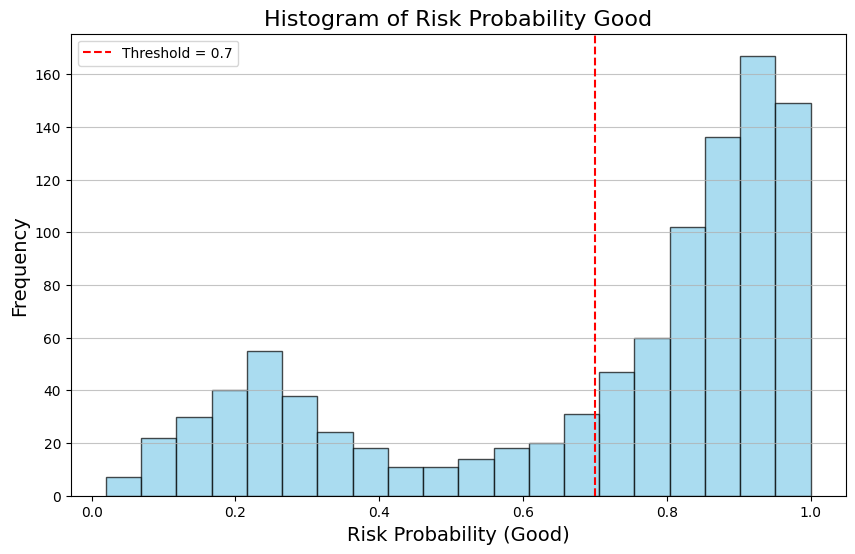

In [56]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.hist(credit_data['Risk Probability Good'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(x=0.7, color='red', linestyle='--', label='Threshold = 0.7')  
plt.title('Histogram of Risk Probability Good', fontsize=16)
plt.xlabel('Risk Probability (Good)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()


This code utilizes the Random Forest model to perform credit risk analysis and evaluate individuals' credit applications.

1. **Data Preparation:**

- Missing values were filled.
- Categorical variables were converted into numerical values using One-Hot Encoding.

2. **Model Training:**

- The dataset was split into 70% training and 30% testing.
- The Random Forest model was trained on the training data.

3. **Prediction and Probability Calculation:**

- The model calculated a "Risk Probability Good" score for each individual.
- A threshold value (0.7) was set to determine credit approval or denial.

4. **Decision Mechanism:**

- **Risk Probability Good** ≥ 0.7: Credit was approved (Credit Approved).
- **Risk Probability Good** < 0.7: Credit was denied (Credit Denied).

5. **Result Saving and Visualization:**

- Results were saved in a file named "credit_decision_results_final.csv".
- Customers approved and denied for credit were displayed separately with relevant details.

**Conclusion:**

This process demonstrates how data science and machine learning techniques can be effectively applied to evaluate credit applications. The Random Forest model was successfully used to predict credit risk and establish a structured decision-making mechanism.